# Multiclass Classification: Penguin Species Prediction
*A practical guide with clear explanations*

## 1. Understanding the Problem
We want to predict a penguin's species based on its flipper length.

**Classes:**
 - 0: Adelie 🐧
 - 1: Gentoo 🐧
 - 2: Chinstrap 🐧

**Key Concept:** Unlike binary classification (yes/no), we now have 3+ possible outcomes.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,
                           classification_report,
                           ConfusionMatrixDisplay)

## 2. Preparing the Data
Let's create sample penguin data with flipper lengths and species.

In [9]:
#sample data
penguin_data = {
    'FlipperLength': [
        # Adelie (10 samples)
        167, 172, 170, 169, 171, 168, 165, 166, 173, 174,
        # Gentoo (10 samples)
        197, 195, 200, 202, 198, 196, 199, 201, 194, 193,
        # Chinstrap (10 samples)
        225, 220, 222, 224, 221, 223, 219, 218, 226, 227
    ],
    'Species': [
        0,0,0,0,0,0,0,0,0,0,  # Adelie
        1,1,1,1,1,1,1,1,1,1,    # Gentoo
        2,2,2,2,2,2,2,2,2,2     # Chinstrap
    ]
}
df = pd.DataFrame(penguin_data)

print("First 5 rows:")
print(df.head())

First 5 rows:
   FlipperLength  Species
0            167        0
1            172        0
2            170        0
3            169        0
4            171        0


## 3. Training the Model
Using stratify to maintain class balance

In [13]:
#Train/Test Split (Stratified)
X = df[['FlipperLength']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% test = 9 samples
    stratify=y,          # Maintains class ratios
    random_state=42      # For reproducibility
)

print("\nTraining set size:", len(X_train))
print("Test set size:", len(X_test))
print("Test set class distribution:")
print(y_test.value_counts())

# Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)




Training set size: 21
Test set size: 9
Test set class distribution:
Species
0    3
2    3
1    3
Name: count, dtype: int64


# 4. Evaluating Performance
We use a confusion matrix and classification report.


Confusion Matrix:


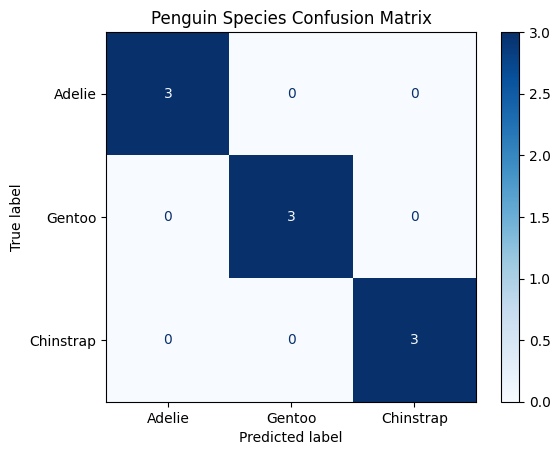


Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00         3
      Gentoo       1.00      1.00      1.00         3
   Chinstrap       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [18]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Adelie','Gentoo','Chinstrap']
)
disp.plot(cmap='Blues')
plt.title("Penguin Species Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=['Adelie','Gentoo','Chinstrap'],
    zero_division=0
))


# 7. Visualizing Decisions

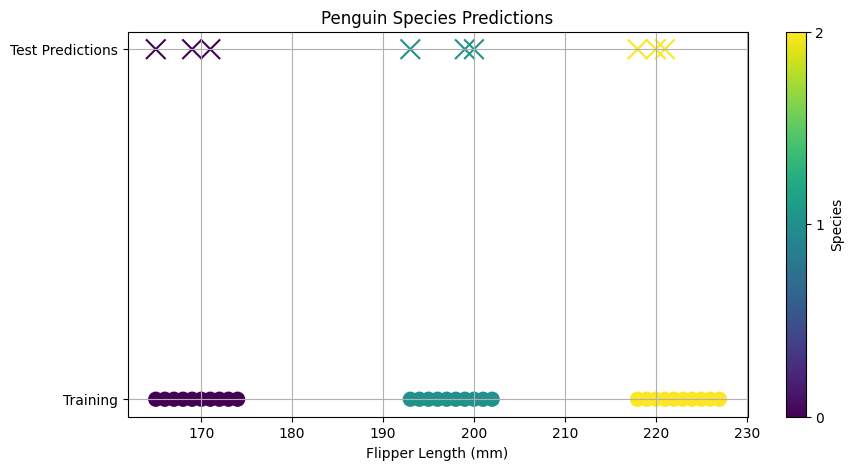

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X['FlipperLength'], [0]*len(X), c=y, cmap='viridis', s=100)
plt.scatter(X_test['FlipperLength'], [0.1]*len(X_test),
           c=y_pred, cmap='viridis', s=200, marker='x')
plt.title("Penguin Species Predictions")
plt.xlabel("Flipper Length (mm)")
plt.yticks([0, 0.1], ["Training", "Test Predictions"])
plt.colorbar(ticks=[0,1,2], label='Species')
plt.grid(True)
plt.show()

## Key Takeaways
 1. **Bigger test set** = More complete confusion matrix
 2. **Stratified split** ensures all classes appear
 3. **Visualizations** help understand model decisions